# Aprendizaje supervisado

El aprendizaje supervisado es la forma de ML más común.

La **tarea T** consiste en aprender una transformación $f:\mathcal{X}\to\mathcal{Y}$ donde:
* Las **entradas** $\boldsymbol{x}\in\mathcal{X}$, **características, covariables o predictores** suelen ser un vector numérico de dimensión fija; por ejemplo, $\mathcal{X}=\mathbb{R}^D$, donde $D$ es la dimensión del vector.
* Las **salidas** $\boldsymbol{y}\in\mathcal{Y}$, **etiquetas, objetivos o respuestas** suelen ser etiquetas de clase o reales.

La **experiencia E** viene dada por un **conjunto de entrenamiento,** esto es, un conjunto de $N$ pares entrada-salida
$$\mathcal{D}=\{(\boldsymbol{x}_n,\boldsymbol{y}_n)\}_{n=1}^N$$
donde $N$ es el **tamaño de la muestra**; también es usual referirnos a cada par $(\boldsymbol{x}_n,\boldsymbol{y}_n)$ como **muestra (de entrenamiento).**

La **medida de rendimiento P** depende del tipo de salida.

## Clasificación

En los problemas de **clasificación,** el espacio de salida es un conjunto de $C$ etiquetas mútuamente exclusivas y desordenadas que llamamos **clases,** $\mathcal{Y}=\{1,2,\dotsc,C\}$. La predicción de la etiqueta de clase de una entrada dada se conoce como **reconocimiento de formas (pattern recognition).** La **clasificación binaria** es un caso particular de gran interés académico y práctico en el que solo tenemos dos clases, las cuales se suelen denotar como $y\in\{0,1\}$ o $y\in\{-1,+1\}$.


### Ejemplo: clasificación de flores iris

La clasificación de flores iris de las especies setosa, versicolor y virgínica es un ejemplo clásico en clasificación estadística:

| Setosa                      | Versicolor                      | Virgínica                      |
| --------------------------- | ------------------------------- | ------------------------------ |
| <img src="Figure_1.1_A.png" width="150"/> | <img src="Figure_1.1_B.png" width="150"/> | <img src="Figure_1.1_C.png" width="150"/> |

El espacio de entrada $\mathcal{X}$ es un conjunto de imágenes que, por lo general, es de dimensión muy elevada. Por ejemplo, para una imagen a color con $C=3$ canales y $D_1\times D_2$ píxeles, tenemos $\mathcal{X}=\mathbb{R}^D$ con $D=C\times D_1\times D_2$. Así pues, el aprendizaje de $f:\mathcal{X}\to\mathcal{Y}$ es muy difícil, si bien ciertos modelos avanzados consiguen aprender $f$ en algunas tareas.

Ai igual que en otras muchas tareas de aprendizaje supervisado, en el caso de iris disponemos de **conocimiento a priori** sobre la tarea en forma de características numéricas altamente informativas (discriminativas). Concretamente, sabemos que la longitud y amplitud de sépalos y pétalos es altamente discriminativa, por lo que podemos trabajar con un espacio de entrada de dimensión mucho más reducida que el de las imágenes originales, $\mathcal{X}=\mathbb{R}^4$. El **corpus iris,** posiblemente el ejemplo de **datos tabulados (tabular data)** más conocido, es una **matriz de datos (design matrix)** de $N=150$ **muestras** (filas) descritas mediante $D=4$ **características** (columnas) junto con sus **etiquetas de clase** correspondientes ($50$ muestras por clase).

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = pd.Series(iris.target_names[iris.target], dtype='category')
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Análisis exploratorio de datos

El **análisis exploratorio de datos** consiste en realizar un estudio preliminar de los datos de un problema de ML para familiarizarse con el mismo. Un objetivo fundamental de este análisis es la detección de patrones obvios de los datos, si los hay, para hacerse una idea de la dificultad del problema y, en definitiva, de qué resultados podemos esperar con diferentes métodos (p.e. lineales o no). En paralelo con la detección de patrones obvios de los datos, también se persigue la detección de problemas obvios con los mismos. En particular, tiene gran interés la detección de **outliers** y **label noise (etiquetas dudosas)**. Los outliers son datos con características o etiquetas **perdidas** o **incorrectas** (p.e. por encontrarse fuera del dominio en el que se definen).

Una herramienta sencilla y efectiva para llevar a cabo un análisis exploratorio de datos es la **inspección visual** de una representación gráfica de los mismos. Si se tiene un conjunto reducido de $D$ características, podemos construir un **gráfico de pares (pair plot),** esto es, una matriz de $D\times D$ gráficos para comparar dos a dos las características (fuera de la diagonal) y examinar la distribución de cada característica por separado (en la diagonal).

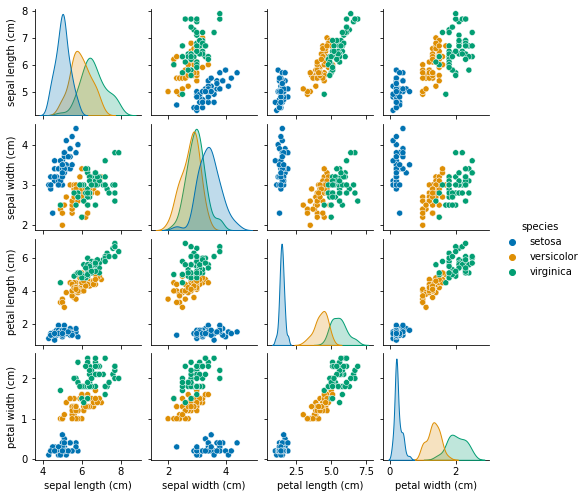

In [2]:
import seaborn as sns
sns.pairplot(data, hue="species", height = 1.75, palette = 'colorblind');

Si se tienen muchas características, podemos aplicar una técnica de **reducción de la dimensión** para visualizar los datos reducidos en 2d o 3d.

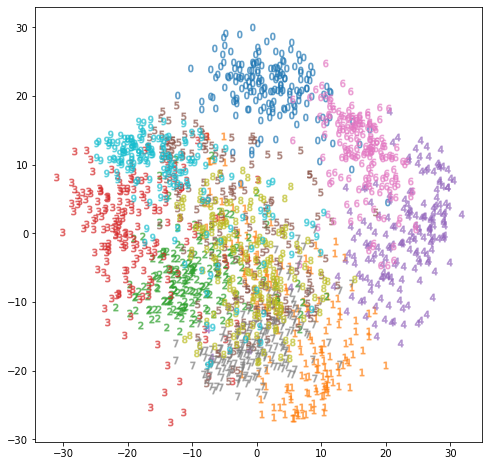

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
digits = load_digits()
X2d = PCA(n_components=2).fit_transform(digits.data)
plt.figure(figsize=(8, 8))
colors = cm.tab10(np.linspace(0, 1, 10))
for digit in digits.target_names:
    plt.scatter(*X2d[digits.target == digit].T, marker=f"${digit}$", s=50, alpha=0.5, color=colors[digit])